## Final Project 

### Using Market Basket Analysis to Improve Product Bundle Sales Strategy for Online Retail companies


Group Epsilon:

Yu Qiu (qiu.yu1@northeastern.edu)

Chengjie Zhang (zhang.chengj@northeastern.edu)

Fatima Nurmakhamadova (nurmakhamadova.f@northeastern.edu)


Class ALY6110. 80442: Big Data and Data Management

June 27, 2022

In [0]:
#Install mlxtend package which comtains apriori & association_rules
#This is installed at the beginning as it will restart the notebook
%pip install mlxtend

Python interpreter will be restarted.
Python interpreter will be restarted.


### Data Extraction
Importing the dataset

In [0]:
# File location and type
#Please upload two attached files to DBFS, particularly in /FileStore/tables/
f1_loc = "/FileStore/tables/online_retail_2009_2010.csv"
f2_loc = "/FileStore/tables/online_retail_2010_2011.csv"
file_type = "csv"

# CSV options of file parameters
infer_schema = "false" #true
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
# Import csv file for 2009 - 2010 and read it into Spark data frame
df1 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(f1_loc)

# Import csv file for 2010 - 2011 and read it into Pyspark data frame
df2 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(f2_loc)

#Show the datasets
display(df1) 
display(df2)

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/09 07:45,6.95,13085,United Kingdom
489434,79323P,PINK CHERRY LIGHTS,12,12/1/09 07:45,6.75,13085,United Kingdom
489434,79323W,WHITE CHERRY LIGHTS,12,12/1/09 07:45,6.75,13085,United Kingdom
489434,22041,"""RECORD FRAME 7"""" SINGLE SIZE """,48,12/1/09 07:45,2.1,13085,United Kingdom
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/09 07:45,1.25,13085,United Kingdom
489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/09 07:45,1.65,13085,United Kingdom
489434,21871,SAVE THE PLANET MUG,24,12/1/09 07:45,1.25,13085,United Kingdom
489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,12/1/09 07:45,5.95,13085,United Kingdom
489435,22350,CAT BOWL,12,12/1/09 07:46,2.55,13085,United Kingdom
489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,12/1/09 07:46,3.75,13085,United Kingdom


Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 08:26,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/10 08:26,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 08:26,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 08:26,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 08:26,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 08:26,7.65,17850,United Kingdom
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 08:26,4.25,17850,United Kingdom
536366,22633,HAND WARMER UNION JACK,6,12/1/10 08:28,1.85,17850,United Kingdom
536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 08:28,1.85,17850,United Kingdom
536368,22960,JAM MAKING SET WITH JARS,6,12/1/10 08:34,4.25,13047,United Kingdom


In [0]:
#Import pandas library into our environment for data manipulation and analysis
import pandas as pd

# convert Spark data frames to pandas dataframes  
df1_pandas = df1.toPandas()
df2_pandas = df2.toPandas()

#Join dataset from 2009-2010 and 2010-2011
data =pd.concat([df1_pandas, df2_pandas])

In [0]:
#Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Invoice      1067371 non-null  object
 1   StockCode    1067371 non-null  object
 2   Description  1062989 non-null  object
 3   Quantity     1067371 non-null  object
 4   InvoiceDate  1067371 non-null  object
 5   Price        1067371 non-null  object
 6   Customer ID  824364 non-null   object
 7   Country      1067371 non-null  object
dtypes: object(8)
memory usage: 73.3+ MB


In [0]:
#Show unique values in each column
data.nunique()

Out[4]: Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

### Data Cleaning

##### Converting Wrong types into correct ones

In [0]:
#Convert date from object to date 
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']) #.dt.date
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"""RECORD FRAME 7"""" SINGLE SIZE """,48,2009-12-01 07:45:00,2.1,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [0]:
#Convert Quantity from object into integer
data['Quantity'] = data['Quantity'].astype('int')
 
#Convert Price from object into float
data['Price'] = data['Price'].astype('float')

#Check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   object        
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 73.3+ MB


##### Checking for missing values

In [0]:
# Check percentage of missing values 
percent_missing = data.isnull(). sum() * 100 / len(data)
percent_missing

Out[7]: Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

In [0]:
#Replace na in Customer ID with 'non-members'
data['Customer ID'].fillna('non-members',inplace=True)

#Recheck the column
data['Customer ID'].value_counts()

Out[8]: non-members    243007
17841           13097
14911           11613
12748            7307
14606            6709
                ...  
16663               1
17752               1
13942               1
15913               1
16994               1
Name: Customer ID, Length: 5943, dtype: int64

In [0]:
#Drop rows with missing values
data_new=data.dropna()

#Recheck missing values 
data_new.isna().any()

Out[9]: Invoice        False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
Price          False
Customer ID    False
Country        False
dtype: bool

In [0]:
#Check Updated dataframe info
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062989 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1062989 non-null  object        
 1   StockCode    1062989 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1062989 non-null  int64         
 4   InvoiceDate  1062989 non-null  datetime64[ns]
 5   Price        1062989 non-null  float64       
 6   Customer ID  1062989 non-null  object        
 7   Country      1062989 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 73.0+ MB


In [0]:
#Check if there are price 0 or below
data_new[data_new['Price'] <= 0]
#Drop prices equal to or below 0 if any
data_clean = data_new[data_new['Price'] > 0]

#Check if there are price 0 or below
data_clean[data_clean['Price'] <= 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [0]:
#Check if there are quantities 0 or below
data_clean[data_clean['Quantity'] <= 0]
#Drop Quantity equal to or below 0 if any
data_clean = data_clean[data_clean['Quantity'] > 0]

#Check if there are Quantity 0 or below
data_clean[data_clean['Quantity'] <= 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [0]:
#Show the descriptive statistics
data_clean.describe()

,Quantity,Price
count,1.041671e+06,1.041671e+06
mean,1.096345e+01,4.077038e+00
std,1.265149e+02,5.144898e+01
min,1.000000e+00,1.000000e-03
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.130000e+00
max,8.099500e+04,2.511109e+04


In [0]:
#Check the largest outlier values in Quantity 
data_clean[data_clean['Quantity'] >= 40000]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [0]:
#Check the largest outlier values in Price 
data_clean[data_clean['Price'] >= 8000]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
74356,496115,M,Manual,1,2010-01-29 11:04:00,8985.60,17949,United Kingdom
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918,United Kingdom
135015,502265,M,Manual,1,2010-03-23 15:28:00,10953.50,non-members,United Kingdom
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,non-members,United Kingdom
342147,522796,M,Manual,1,2010-09-16 15:12:00,10468.80,non-members,United Kingdom
358639,524159,M,Manual,1,2010-09-27 16:12:00,10468.80,14063,United Kingdom
372834,525399,M,Manual,1,2010-10-05 11:49:00,10468.80,non-members,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,non-members,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,non-members,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


In [0]:
#Drop Manual, Postage, DOTCOM POSTAGE, and AMAZON FEE products in Description column
data_clean.drop(data_clean[data_clean['Description'] == 'Manual'].index, inplace = True)
data_clean.drop(data_clean[data_clean['Description'] == 'POSTAGE'].index, inplace = True)
data_clean.drop(data_clean[data_clean['Description'] == 'DOTCOM POSTAGE'].index, inplace = True)
data_clean.drop(data_clean[data_clean['Description'] == 'AMAZON FEE'].index, inplace = True)
data_clean.drop(data_clean[data_clean['Description'] == 'Adjust bad debt'].index, inplace = True)
 
#Recheck again
data_clean[data_clean['Description'] == 'Manual']
data_clean[data_clean['Description'] == 'POSTAGE']
data_clean[data_clean['Description'] == 'DOTCOM POSTAGE']
data_clean[data_clean['Description'] == 'AMAZON FEE']
data_clean[data_clean['Description'] == 'Adjust bad debt']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [0]:
#Recheck cleaned dataset info
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033437 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1033437 non-null  object        
 1   StockCode    1033437 non-null  object        
 2   Description  1033437 non-null  object        
 3   Quantity     1033437 non-null  int64         
 4   InvoiceDate  1033437 non-null  datetime64[ns]
 5   Price        1033437 non-null  float64       
 6   Customer ID  1033437 non-null  object        
 7   Country      1033437 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 71.0+ MB


### Data Visualization

#### At which time customers get the most orders from this store?

In [0]:
#The entry point into all functionality in Spark is the SparkSession class. To create a basic SparkSession, just use SparkSession.builder
from pyspark.sql import SparkSession

#SparkConf passed to your SparkContext. SparkConf allows you to configure some of the common properties (e.g. master URL and application name)
from pyspark import SparkConf

#Create a spark session
ss = SparkSession.builder.appName('Test').getOrCreate()

#Enable Arrow-based columnar data transfers
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

#Create a Spark DataFrame from a pandas DataFrame using Arrow
data_clean_spark = spark.createDataFrame(data_clean)

#Convert the Spark DataFrame back to a pandas DataFrame using Arrow
data_clean_pandas = data_clean_spark.select("*").toPandas()

In [0]:
#from datetime package we can have many functions of dealing with the datetime such as weekday() and other
from datetime import datetime

#Select InvoiceDate and to split this column:
df_time = data_clean_pandas['InvoiceDate']
df_time = pd.to_datetime(df_time)
df_time

Out[19]: 0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1033432   2011-12-09 12:50:00
1033433   2011-12-09 12:50:00
1033434   2011-12-09 12:50:00
1033435   2011-12-09 12:50:00
1033436   2011-12-09 12:50:00
Name: InvoiceDate, Length: 1033437, dtype: datetime64[ns]

In [0]:
#def a fuction to splot one row of datetime to Y/M/D/H/M
def get_ymd(date):
    Y,M,D,H,m=[],[],[],[],[]
    for i in range(len(date)):
        oneday=date[i]
        year=oneday.year
        month=oneday.month
        day=oneday.day
        hour=oneday.hour
        minute=oneday.minute

        Y.append(year)
        M.append(month)
        D.append(day)
        H.append(hour)
        m.append(minute)
    date=pd.DataFrame()
    date['year']=Y
    date['month']=M
    date['day']=D
    date['hour']=H
    date['minute']=m
    return date

In [0]:
df_time = get_ymd(df_time)
df_time

,year,month,day,hour,minute
0,2009,12,1,7,45
1,2009,12,1,7,45
2,2009,12,1,7,45
3,2009,12,1,7,45
4,2009,12,1,7,45
...,...,...,...,...,...
1033432,2011,12,9,12,50
1033433,2011,12,9,12,50
1033434,2011,12,9,12,50
1033435,2011,12,9,12,50


In [0]:
#Use join to join the new df_time with the origin data set 
data_clean_pandas2=data_clean_pandas.join(df_time)

#Show the changes
data_clean_pandas2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,month,day,hour,minute
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12,1,7,45
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,1,7,45
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,1,7,45
3,489434,22041,"""RECORD FRAME 7"""" SINGLE SIZE """,48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009,12,1,7,45
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009,12,1,7,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033432,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011,12,9,12,50
1033433,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011,12,9,12,50
1033434,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,9,12,50
1033435,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,9,12,50


In [0]:
#Change dataset into spark
data_clean_pyspark2 = spark.createDataFrame(data_clean_pandas2)

In [0]:
#Use Spark dataframe to create one table in SQL called "dfs"
spark = SparkSession.builder.config(conf=SparkConf()).getOrCreate()
data_clean_pyspark2.createOrReplaceTempView("dfs")

In [0]:
#Here I can use pyspark to write the sql code and get the result
spark.sql("select * from dfs").show()

+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+----+-----+---+----+------+
|Invoice|StockCode|         Description|Quantity|        InvoiceDate|Price|Customer ID|       Country|year|month|day|hour|minute|
+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+----+-----+---+----+------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|2009-12-01 07:45:00| 6.95|      13085|United Kingdom|2009|   12|  1|   7|    45|
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|2009-12-01 07:45:00| 6.75|      13085|United Kingdom|2009|   12|  1|   7|    45|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|2009-12-01 07:45:00| 6.75|      13085|United Kingdom|2009|   12|  1|   7|    45|
| 489434|    22041|"RECORD FRAME 7""...|      48|2009-12-01 07:45:00|  2.1|      13085|United Kingdom|2009|   12|  1|   7|    45|
| 489434|    21232|STRAWBERRY CERAMI...|      24|2009-12-01 07:45:00| 1.25|      13085|Uni

In [0]:
%sql
--Similarly I can directly use SQL code to get the result
select count(Invoice) as total_invoices, hour from dfs Group by hour order by hour

total_invoices,hour
1,6
1051,7
15532,8
66385,9
89781,10
117486,11
155430,12
146176,13
137400,14
131338,15


#### At which time do customers get the most orders from this store in a week?

In [0]:
#Use the column of InvoiceDate to get the weekday
data3=data_clean_pandas2
df_weekday = data_clean_pandas2['InvoiceDate']
df_weekday = pd.to_datetime(df_weekday)
data3['weekday']=df_weekday.dt.day_name()
data3

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year,month,day,hour,minute,weekday
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12,1,7,45,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,1,7,45,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,1,7,45,Tuesday
3,489434,22041,"""RECORD FRAME 7"""" SINGLE SIZE """,48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009,12,1,7,45,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009,12,1,7,45,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033432,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011,12,9,12,50,Friday
1033433,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011,12,9,12,50,Friday
1033434,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,9,12,50,Friday
1033435,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,9,12,50,Friday


In [0]:
#Use pivot_table to get a new dateframe which columns is hour, index is weekday
heatmap=pd.pivot_table(data3,index='weekday',columns='hour',values='Invoice',aggfunc='count')
heatmap

hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
weekday,,,,,,,,,,,,,,,
Friday,NaN,178.0,3221.0,12778.0,16361.0,19508.0,20640.0,18495.0,21082.0,15850.0,10636.0,8621.0,626.0,88.0,8.0
Monday,NaN,155.0,2946.0,15277.0,17312.0,18929.0,25402.0,26329.0,22370.0,22636.0,16862.0,13246.0,1914.0,NaN,NaN
Saturday,NaN,NaN,NaN,NaN,30.0,4.0,102.0,101.0,56.0,69.0,37.0,NaN,NaN,NaN,NaN
Sunday,NaN,NaN,NaN,79.0,8894.0,22923.0,28618.0,25697.0,20504.0,21322.0,9253.0,70.0,NaN,NaN,NaN
Thursday,1.0,287.0,3042.0,13448.0,16945.0,18045.0,25004.0,24973.0,25304.0,20396.0,18591.0,10538.0,9037.0,8120.0,2008.0
Tuesday,NaN,251.0,2895.0,13192.0,15367.0,18555.0,27688.0,26467.0,23577.0,26523.0,19119.0,10962.0,4490.0,281.0,9.0
Wednesday,NaN,180.0,3428.0,11611.0,14872.0,19522.0,27976.0,24114.0,24507.0,24542.0,16397.0,11753.0,158.0,15.0,18.0


In [0]:
#Fillna as 0 and reindex the index to regular consquence
heatmap=heatmap.fillna(0)
heatmap=heatmap.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
heatmap2=heatmap.iloc[:,]
heatmap2

hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
weekday,,,,,,,,,,,,,,,
Monday,0.0,155.0,2946.0,15277.0,17312.0,18929.0,25402.0,26329.0,22370.0,22636.0,16862.0,13246.0,1914.0,0.0,0.0
Tuesday,0.0,251.0,2895.0,13192.0,15367.0,18555.0,27688.0,26467.0,23577.0,26523.0,19119.0,10962.0,4490.0,281.0,9.0
Wednesday,0.0,180.0,3428.0,11611.0,14872.0,19522.0,27976.0,24114.0,24507.0,24542.0,16397.0,11753.0,158.0,15.0,18.0
Thursday,1.0,287.0,3042.0,13448.0,16945.0,18045.0,25004.0,24973.0,25304.0,20396.0,18591.0,10538.0,9037.0,8120.0,2008.0
Friday,0.0,178.0,3221.0,12778.0,16361.0,19508.0,20640.0,18495.0,21082.0,15850.0,10636.0,8621.0,626.0,88.0,8.0
Saturday,0.0,0.0,0.0,0.0,30.0,4.0,102.0,101.0,56.0,69.0,37.0,0.0,0.0,0.0,0.0
Sunday,0.0,0.0,0.0,79.0,8894.0,22923.0,28618.0,25697.0,20504.0,21322.0,9253.0,70.0,0.0,0.0,0.0


Out[29]: Text(0.5, 1.0, 'Weekday-Hour Heatmap For Customer Purchase Frequency')

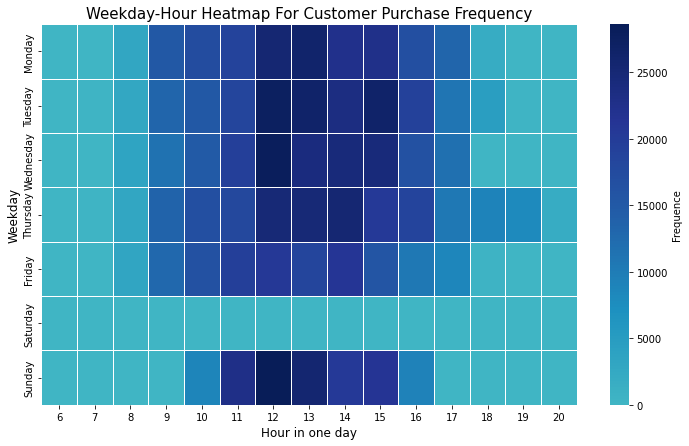

In [0]:
#Import Seaborn, a data visualization library based on matplotlib we will use it to draw heatmap
import seaborn as sns

#Import Pyplot collection of functions from Matplotlib visualization library to manipulate elements of a figure
import matplotlib.pyplot as plt

#Create heatmap to visualize the results
fig = plt.figure(figsize = (12, 7))

ax = sns.heatmap(heatmap2,linewidths=.5,center = 0,cmap="YlGnBu",cbar_kws={'label': 'Frequence'})
ax.set_xlabel('Hour in one day',fontsize = 12)
ax.set_ylabel('Weekday',fontsize = 12)
ax.set_title('Weekday-Hour Heatmap For Customer Purchase Frequency',fontsize = 15)

#### Top 10 Product sold the most

In [0]:
#Calculate the total quantity of products sold and their average prices
products_by_quantity = (data_clean.groupby('Description', as_index=False)
       .agg({'Quantity':'sum', 'Price':'mean'}).sort_values('Quantity', ascending = False)
       .rename(columns={'Quantity':'Total Quantity', 'Price':'Average Price'}))

#Extract only Top 10 Product sold the most
top_10_sales = products_by_quantity.head(10)
#Convert Index Description to Column 
top_10_sales.reset_index(inplace=True)
#Show the result
top_10_sales

,index,Description,Total Quantity,Average Price
0,5278,WORLD WAR 2 GLIDERS ASSTD DESIGNS,109418,0.283667
1,5157,WHITE HANGING HEART T-LIGHT HOLDER,96496,3.135235
2,3190,"PAPER CRAFT , LITTLE BIRDIE",80995,2.080000
3,342,ASSORTED COLOUR BIRD ORNAMENT,80888,1.857053
4,2469,JUMBO BAG RED RETROSPOT,79047,2.387057
5,2753,MEDIUM CERAMIC TOP STORAGE JAR,78032,1.464498
6,805,BROCADE RING PURSE,71330,0.303032
7,3126,PACK OF 60 PINK PAISLEY CAKE CASES,56489,0.712824
8,200,60 TEATIME FAIRY CAKE CASES,54656,0.663410
9,4610,SMALL POPCORN HOLDER,49909,1.039266


<command-2892575000247732>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_10_sales['Description'], rotation = 80, fontsize = 10)


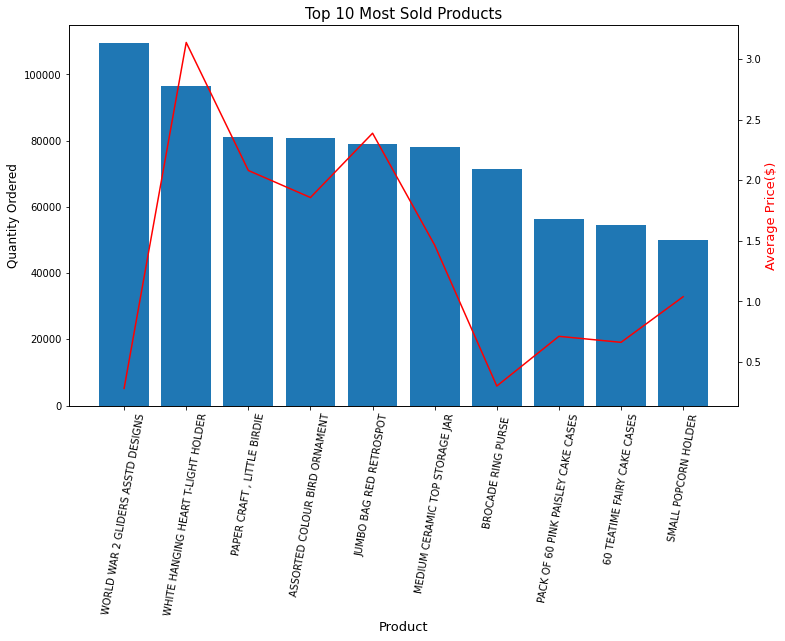

In [0]:
#Import Pyplot collection of functions from Matplotlib visualization library to manipulate elements of a figure
import matplotlib.pyplot as plt

#Plot the top 10 Product sold most with Price
fig, ax1 = plt.subplots(figsize = (12, 7))

ax2 = ax1.twinx()
#Bar plot for the Quantity of Products
ax1.bar(top_10_sales['Description'], top_10_sales['Total Quantity'])
#Line plot for the Price of Products
ax2.plot(top_10_sales['Description'], top_10_sales['Average Price'], color = 'r')

ax1.set_ylabel('Quantity Ordered', fontsize = 12)
ax1.set_xlabel('Product', fontsize = 13)
plt.grid(False)
#Add y label for Line plot of the Price column
ax2.set_ylabel('Average Price($)', color = 'r', fontsize = 13)
#Add graph title
ax1.set_title('Top 10 Most Sold Products', fontsize = 15)
#Set x label ticks to rotate for 80 degrees
ax1.set_xticklabels(top_10_sales['Description'], rotation = 80, fontsize = 10)
plt.show()

#### What are the top 10 Products Most Often Sold Together?

In [0]:
#Joining products with the same Invoice number into the same line
#Copy the clean data to add new column
data_products = data_clean

#Group by Invoice anfd Description assigning all products with same invoice to a new column
data_products['Product Bundle'] = data_products.groupby('Invoice')['Description'].transform(lambda x: ','.join(x))

#Dropping the duplicate values of same invoices
data_products = data_products[['Invoice', 'Product Bundle']].drop_duplicates()
data_products.head()

,Invoice,Product Bundle
0,489434,"15CM CHRISTMAS GLASS BALL 20 LIGHTS,PINK CHERR..."
8,489435,"CAT BOWL ,DOG BOWL , CHASING BALL DESIGN,HEART..."
12,489436,"DOOR MAT BLACK FLOCK ,LOVE BUILDING BLOCK WORD..."
31,489437,"CHRISTMAS CRAFT HEART DECORATIONS,CHRISTMAS CR..."
54,489438,"DINOSAURS WRITING SET ,SET OF MEADOW FLOWER ..."


In [0]:
#Import tool that returns the length subsequences of elements from the input iterable
from itertools import combinations

#Import container that will hold the data in an unordered collection, like hashtable objects.
from collections import Counter

#Set the counter
count = Counter()

#Create a for loop to count most frequent product combinations in Product bundles
for row in data_products['Product Bundle']:
    row_list = row.split(',') #split each product combination with comma
    count.update(Counter(combinations(row_list, 2))) #Counting all the 2 product bandles
    
#Show top 10 most common combinations
for value, count in count.most_common(10):
    print(count,':', value)

2566 : ('KEY FOB ', 'KEY FOB ')
2516 : ('FRENCH BLUE METAL DOOR SIGN', 'FRENCH BLUE METAL DOOR SIGN')
1518 : ('KEY FOB ', ' SHED')
1501 : ('KEY FOB ', ' BACK DOOR ')
1128 : ('KEY FOB ', ' FRONT  DOOR ')
1018 : ('KEY FOB ', ' GARAGE DESIGN')
977 : ('HOOK', 'MAGIC GARDEN')
920 : ('METAL SIGN', 'CUPCAKE SINGLE HOOK')
876 : ('COFFEE', 'SUGAR')
827 : ('RED HANGING HEART T-LIGHT HOLDER', 'WHITE HANGING HEART T-LIGHT HOLDER')


#### Which country of customers placed most orders from this store?

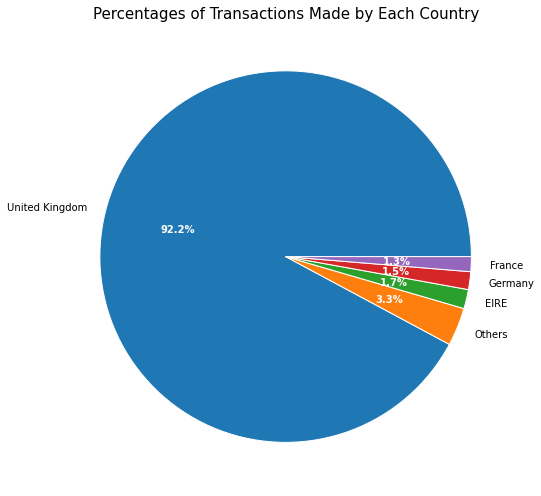

In [0]:
#Percentages of Transactions Made by Each Country
country = data_clean.groupby('Country')['Invoice'].count().sort_values(ascending = False)/len(data_clean['Country'])

#Replace country names which have frequency proportion below 0.005 with "Others"
data_clean.loc[data_clean.groupby('Country')['Invoice']
         .transform('size')
         .div(len(data_clean['Country']))
         .lt(0.005), 
       'Country'] = 'Others'

#Percentages of Transactions Made by Each Country
country = data_clean.groupby('Country')['Invoice'].count().sort_values(ascending = False)/len(data_clean['Country'])

#define values and labels
value = country.values
labels = country.index

#Import Pyplot collection of functions from Matplotlib visualization library to manipulate elements of a figure
import matplotlib.pyplot as plt

#set figure size
fig1, ay = plt.subplots(figsize=(12, 7))

# Capture each of the return elements: add white labels, add white lines with 1.0 width, make text medium size
patches, texts, pcts = ay.pie(
    value, labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'})

# Style just the percent values
plt.setp(pcts, color='white', fontweight='bold')
# Set a title for the graph
plt.title('Percentages of Transactions Made by Each Country', fontsize = 15)
# Adjust the padding between and around subplots
plt.tight_layout()
#show graph
plt.show()


### Association Rules with Apriori Algorithm

In [0]:
#Create a subset basket which only contains UK transactions
basketuk = data_clean[data_clean['Country'] == 'United Kingdom']
#Restructure the data with Invoice as the Index and fill nan with 0
basket = basketuk.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)

In [0]:
#import apriori library which could be used to directly calculate the frequency of 2 products appear in same order
from mlxtend.frequent_patterns import apriori

#import association_rules which could calculate the metrics:Lift, Confidence, support
from mlxtend.frequent_patterns import association_rules

#Use Apriori algorithm to calculate the support with the threshold of minimun support 0.03
frequent_itemsets = apriori(basket, min_support= 0.03, use_colnames=True)
 
#set the rule metric as lift with minimun value of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

/local_disk0/.ephemeral_nfs/envs/pythonEnv-e0a339ef-9d7b-4593-852d-62ed80bf48f9/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [0]:
#show the rules result
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.144379,0.046001,0.032231,0.223242,4.852927,0.02559,1.228179
1,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.046001,0.144379,0.032231,0.700660,4.852927,0.02559,2.858358


#### Visualize Association Rules

Out[38]: Text(0.1, 0.6, 'RED HANGING HEART T-LIGHT HOLDER - WHITE HANGING HEART T-LIGHT HOLDER')

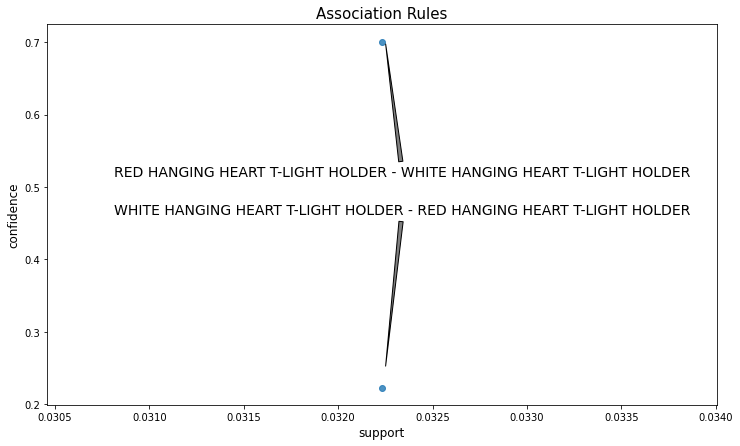

In [0]:
#Define supprot and confidence value
support=rules['support']
confidence=rules['confidence']
 
fig = plt.subplots(figsize=(12, 7)) #set the size of the graph
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')    
reg = sns.regplot(x=support, y=confidence, fit_reg=False)
plt.title('Association Rules', fontsize=15)
plt.xlabel('support', fontsize=12)
plt.ylabel('confidence', fontsize=12)  

#add annotate to the 2 dots
reg.annotate(
    'WHITE HANGING HEART T-LIGHT HOLDER - RED HANGING HEART T-LIGHT HOLDER',
    (0.03225, 0.25), #arrow direction
    xytext=(0.1, 0.5), #test location
    textcoords='axes fraction',
    arrowprops=dict(facecolor='grey', arrowstyle='wedge'),
    fontsize=14)

reg.annotate(
    'RED HANGING HEART T-LIGHT HOLDER - WHITE HANGING HEART T-LIGHT HOLDER',
    (0.03225, 0.7), #arrow direction
    xytext=(0.1, 0.6), #text location
    textcoords='axes fraction',
    arrowprops=dict(facecolor='grey', arrowstyle='wedge'),
    fontsize=14)